### Student Information
Name: Sam Lin 林志勳

Student ID: 312591041

GitHub ID: ChihHsunLin102

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [75]:
### Begin Assignment Here

# Second Part 1. The Data

In [76]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
# Import the dataset already downloaded
import pandas as pd

df = pd.read_csv("C:/Users/slin31/Downloads/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [78]:
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


### 2. Data Preparation

In [79]:
# Number of data entries
len(df)

1500

### 3. Data Transformation

In [80]:
#First 10 comments
df.loc[:10,'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [81]:
#First 10 sentiments
df.loc[:10, 'sentiment']

0     not nostalgia
1         nostalgia
2         nostalgia
3     not nostalgia
4         nostalgia
5         nostalgia
6         nostalgia
7         nostalgia
8     not nostalgia
9     not nostalgia
10    not nostalgia
Name: sentiment, dtype: object

### 4. Data mining with Pandas
#### Missing Values

In [82]:
# check missing values
df.isnull()

,sentiment,comment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1495,False,False
1496,False,False
1497,False,False
1498,False,False


In [83]:
# my functions
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


#### Dealing with duplicate

In [84]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [85]:
sum(df.duplicated())

1

In [86]:
# Drop the only duplicate in the dataset
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [87]:
# Confirm that two entries are removed
len(df)

1498

### 5 Data Preprocessing

#### Sampling

In [88]:
df_sample = df.sample(n=200)

In [89]:
len(df_sample)

200

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
print(df.sentiment.value_counts())

sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

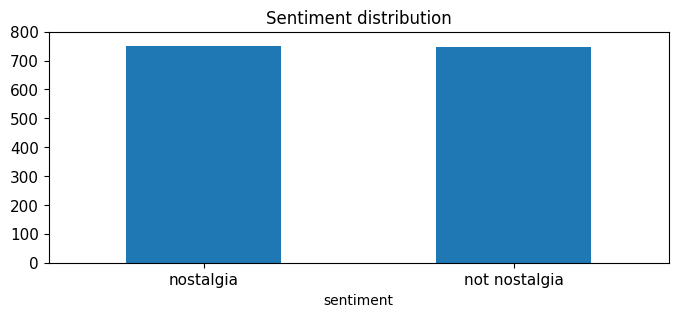

In [92]:
# plot barchart for df
df.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, max(df.sentiment.value_counts())+50],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

#### Feature Creation

In [93]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\slin31\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [94]:
# Tokenize the text in comment column
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

In [95]:
df[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

#### Feature subset selection

In [96]:
# Word Frequency document matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [97]:
# TF-IDF value 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
df_tf = vectorizer.fit_transform(df.comment)
vectorizer.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

In [98]:
# We can check the shape of this matrix by:
df_counts.shape

(1498, 3730)

In [99]:
df_tf.shape

(1498, 3730)

In [100]:
# Word frequency
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

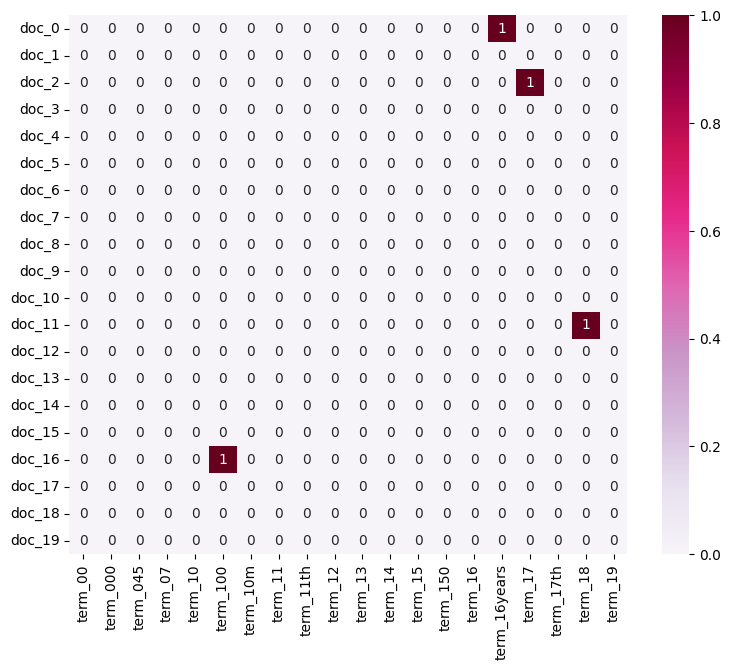

In [101]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [102]:
#TF - IDF
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_tf[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.23198104, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1402027 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

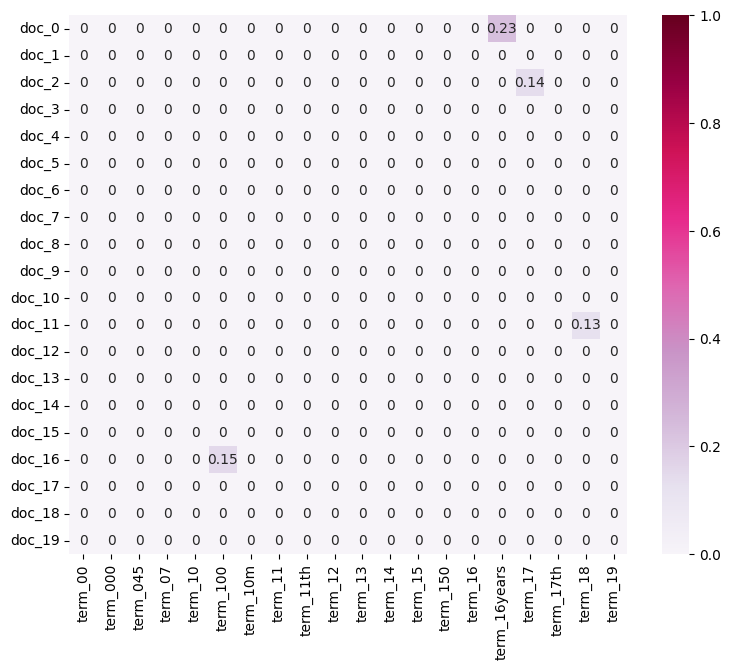

In [103]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [104]:
# More meaningful heat map using random sampling and TF-IDF
df_tf_sample = vectorizer.fit_transform(df_sample.comment)
plot_x = ["term_"+str(i) for i in vectorizer.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df_sample.index)[0:20]]
plot_z = df_tf_sample[0:20, 0:20].toarray() 
plot_z

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2216619 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

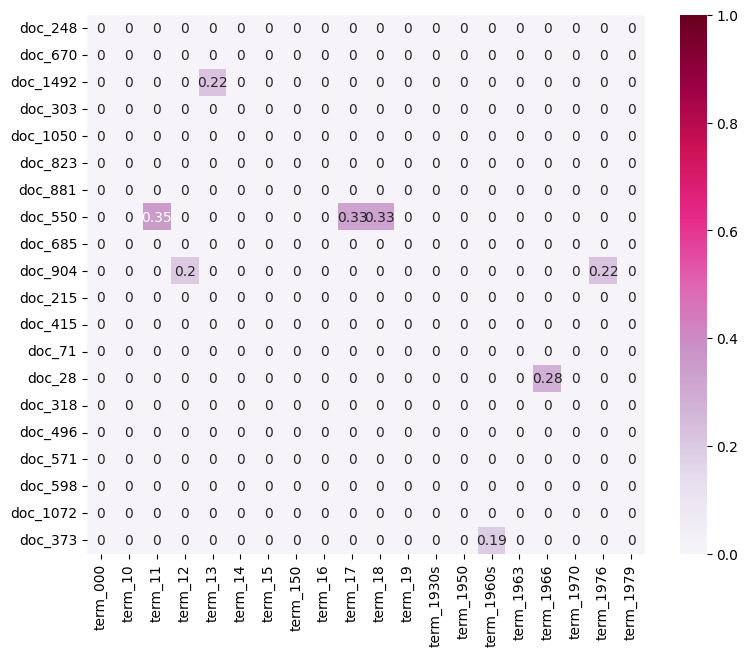

In [105]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Attribute Transformation / Aggregation

In [106]:
import numpy as np
term_frequencies = np.asarray(df_tf.sum(axis=0))[0]

In [107]:
term_frequencies[0] #sum of first term: 00

np.float64(0.3418539944187727)

In [108]:
import plotly.express as px 

# Extract the data to plot (your top 300 terms and their frequencies)
terms = vectorizer.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

# Create a DataFrame to hold the data for easier plotting
import pandas as pd
df_p = pd.DataFrame({'Term': terms, 'Frequency': frequencies})

# Create the interactive bar chart
fig = px.bar(df_p, x='Term', y='Frequency', title='First 300 Term Frequencies')
fig.update_layout(xaxis_tickangle=-90, width=1000, height=500) # Adjust width and height for readability

# Show the figure
fig.show()

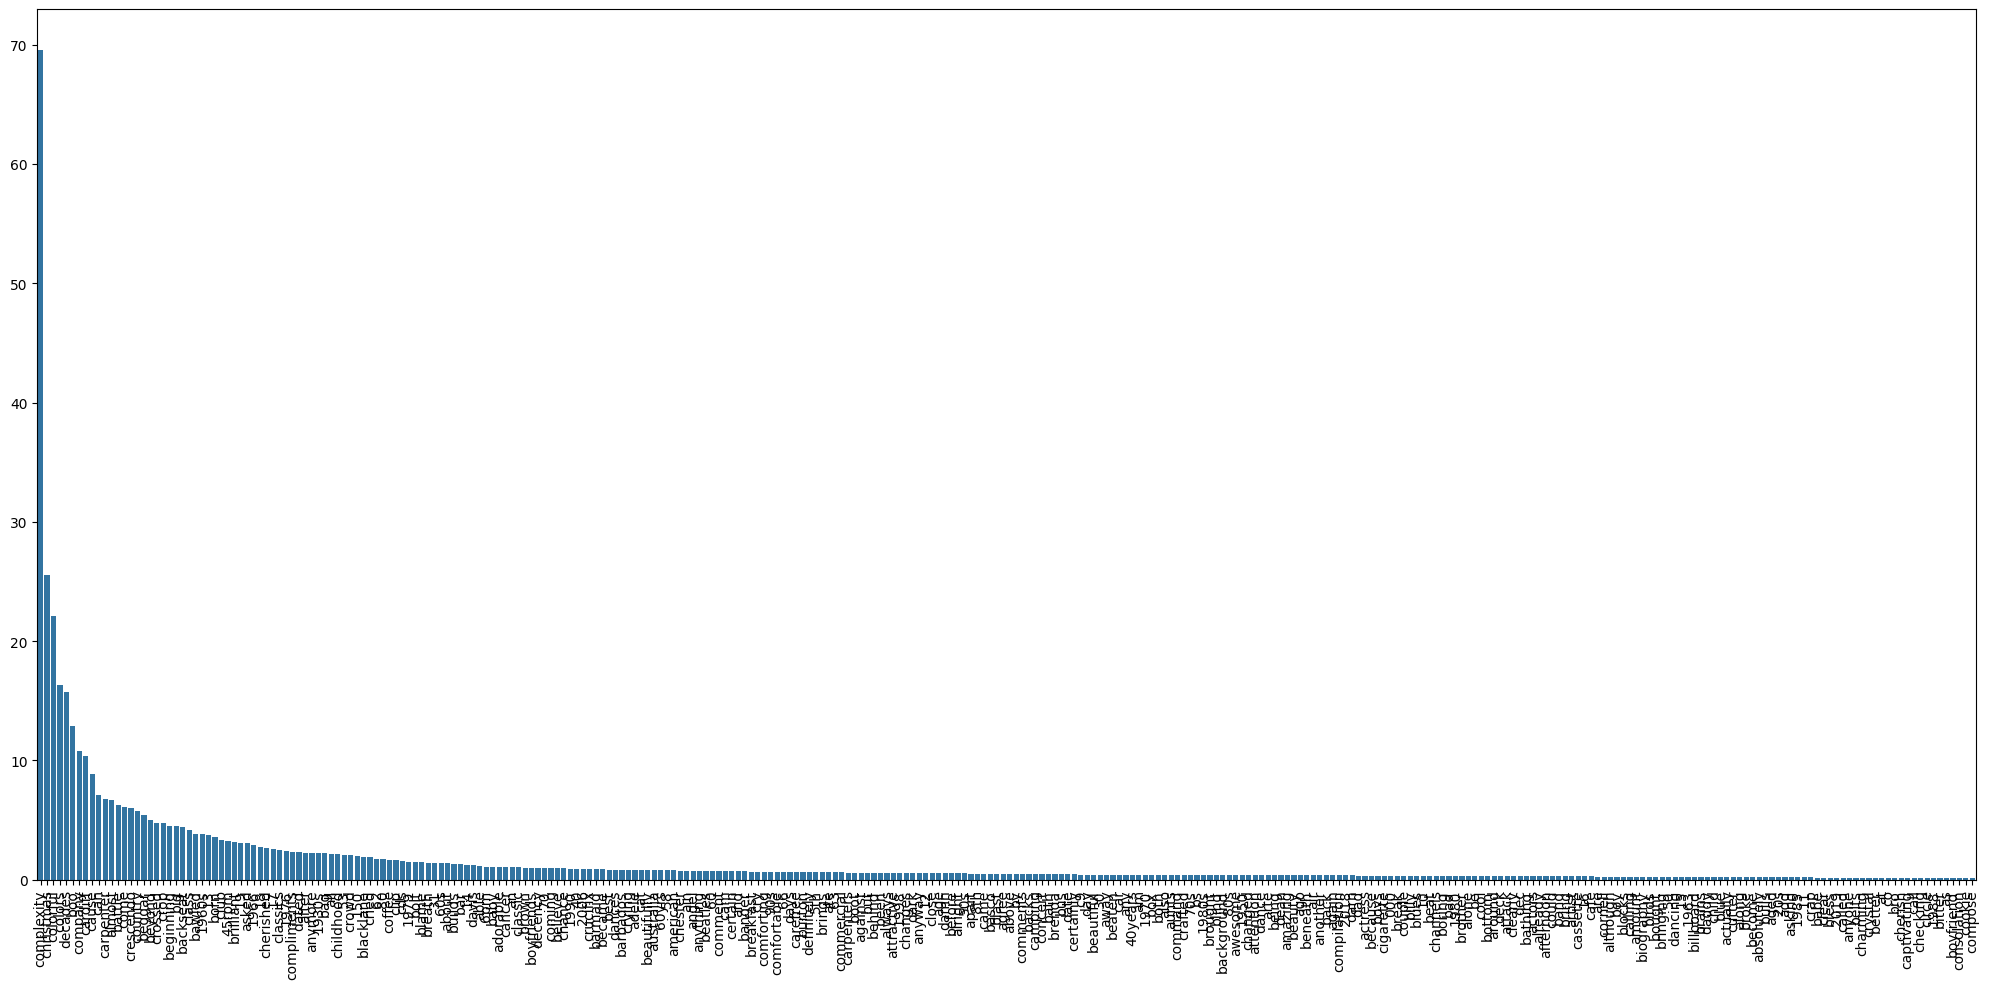

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
# Your code to sort the terms and frequencies
sorted_pairs = sorted(zip(vectorizer.get_feature_names_out()[:300], term_frequencies[:300]), key=lambda pair: pair[1], reverse=True)
x_sorted, y_sorted = zip(*sorted_pairs)
x_sorted = list(x_sorted)
y_sorted = list(y_sorted)
# Plotting with fixed ticks
plt.figure(figsize=(20, 10))  # Adjust size for readability
g = sns.barplot(x=x_sorted, y=y_sorted)
g.set_xticks(range(len(x_sorted)))  # Set fixed ticks
g.set_xticklabels(x_sorted, rotation=90)  # Set tick labels with rotation
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Third Part. Naive Bayes classifier

In [113]:
# word frequency features using Multinomial Naive Bayes 
# Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score



# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df_tf, df['sentiment'], test_size=0.3, random_state=42)

In [114]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

    nostalgia       0.80      0.95      0.87       214
not nostalgia       0.95      0.79      0.86       236

     accuracy                           0.87       450
    macro avg       0.88      0.87      0.87       450
 weighted avg       0.88      0.87      0.87       450



In [115]:
# TF-IDF Features using Complement Naive Bayes 
from sklearn.naive_bayes import ComplementNB
# Split data
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(df_tf, df['sentiment'], test_size=0.3, random_state=42)
# Train Complement Naive Bayes on TF-IDF features
nb_tfidf = ComplementNB()
nb_tfidf.fit(X_tfidf_train, y_train)
# Predict and evaluate
y_pred_tfidf = nb_tfidf.predict(X_tfidf_test)
print("Complement Naive Bayes with TF-IDF")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


Complement Naive Bayes with TF-IDF
Accuracy: 0.8711111111111111
               precision    recall  f1-score   support

    nostalgia       0.81      0.95      0.88       214
not nostalgia       0.95      0.80      0.87       236

     accuracy                           0.87       450
    macro avg       0.88      0.87      0.87       450
 weighted avg       0.88      0.87      0.87       450



### Comment on Complement Naive Bayes with TF-IDF vs Naive Bayes with word frequency

Complement Naive Bayes, when used with TF-IDF features, slightly outperforms Native Bayes with word frequency in terms of accuracy, precision, and recall when no pattern mining has been done before hand.\
The two also differ slightly in the distribution.

# Fourth part. Improving data pre-processing for specific data set

1. Different tokenization and removal of certain words\
Problem: simple tokenization uses a general list of words to ignore, however depending on the subject, relevant words might be removed accidentally\
Solution: \
- Customize the list of words to ignore
- use word stem and group similar terms to reduce dimensionality

2. Handle text length variability
- Longer comment might be more meaningful than shorter comments

3. Other evaluation metrics might better capture the performace than accuracy or precision 